# IART Assignment 2 - Bank Account Fraud Dataset Suite (NeurIPS 2022)

### Objetivo do trabalho: 
O segundo trabalho prático da disciplina IART visa aplicar conceitos teóricos de modelos de Machine Learning e
de algoritmos de Supervised Learning, usando como meio de estudo um dataset que permite a deteção de
fraudes em bancos - nomeadamente ao criar contas bancárias.

### Bibliotecas importadas

In [1]:
# Manipulaçaõ de dados	
import numpy as np   
import pandas as pd 

# Visualização de dados
import seaborn as sns  
import matplotlib.pyplot as plt 

# Pré-processamento 
from sklearn.utils import resample, shuffle  
from sklearn.model_selection import train_test_split   
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from scipy import stats

# Oversampling
from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, GridSearchCV

# Modelos de classificação
from sklearn.ensemble import RandomForestRegressor 
from sklearn.neural_network import MLPClassifier  
from sklearn.naive_bayes import GaussianNB

import lightgbm as lgbm 
from lightgbm import LGBMClassifier

# Métricas de avaliação
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, roc_curve, confusion_matrix)


#from costcla.models import CostSensitiveDecisionTreeClassifier


## Obter os dados do ficheiro csv

In [2]:
data = pd.read_csv('data/Base.csv')

print (data.columns)

Index(['fraud_bool', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'payment_type', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'employment_status',
       'credit_risk_score', 'email_is_free', 'housing_status',
       'phone_home_valid', 'phone_mobile_valid', 'bank_months_count',
       'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source',
       'session_length_in_minutes', 'device_os', 'keep_alive_session',
       'device_distinct_emails_8w', 'device_fraud_count', 'month'],
      dtype='object')


In [3]:
print(data.shape)

data.head(20)

(1000000, 32)


,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,AA,769,...,0,500.0,0,INTERNET,3.888115,windows,0,1,0,7
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,AB,366,...,0,1500.0,0,INTERNET,31.798819,windows,0,1,0,7
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,AC,870,...,0,200.0,0,INTERNET,4.728705,other,0,1,0,7
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,AB,810,...,1,200.0,0,INTERNET,2.047904,linux,0,1,0,7
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,AB,890,...,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,0,7
5,1,0.3,0.143921,-1,30,30,0.028231,-0.748282,AD,732,...,0,200.0,0,INTERNET,4.815073,windows,0,1,0,7
6,1,0.7,0.321554,-1,152,30,0.030680,-0.278994,AB,876,...,0,1500.0,0,INTERNET,1.558977,windows,1,1,0,7
7,1,0.9,0.064817,-1,18,50,0.034557,-1.265721,AB,901,...,0,200.0,1,INTERNET,2.637472,linux,0,1,0,7
8,1,0.7,0.065938,-1,64,40,0.020691,-1.442082,AB,933,...,0,1500.0,0,INTERNET,2.175419,windows,1,1,0,7
9,1,0.9,0.700096,-1,60,40,0.016809,-1.070271,AB,1176,...,0,200.0,0,INTERNET,24.040726,windows,0,1,0,7


## Análise dos dados

In [4]:
#sns.pairplot(data, hue="Revenue", vars=features.append(pd.Index([target])), corner=True)

# Mostrar as columnas e dados relativos a elas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [5]:
# Mostrar estatísticas básicas dos dados
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fraud_bool,1000000.0,0.011029,0.104438,0.000000e+00,0.000000,0.000000,0.000000,1.000000
income,1000000.0,0.562696,0.290343,1.000000e-01,0.300000,0.600000,0.800000,0.900000
name_email_similarity,1000000.0,0.493694,0.289125,1.434550e-06,0.225216,0.492153,0.755567,0.999999
prev_address_months_count,1000000.0,16.718568,44.046230,-1.000000e+00,-1.000000,-1.000000,12.000000,383.000000
current_address_months_count,1000000.0,86.587867,88.406599,-1.000000e+00,19.000000,52.000000,130.000000,428.000000
customer_age,1000000.0,33.689080,12.025799,1.000000e+01,20.000000,30.000000,40.000000,90.000000
days_since_request,1000000.0,1.025705,5.381835,4.036860e-09,0.007193,0.015176,0.026331,78.456904
intended_balcon_amount,1000000.0,8.661499,20.236155,-1.553055e+01,-1.181488,-0.830507,4.984176,112.956928
zip_count_4w,1000000.0,1572.692049,1005.374565,1.000000e+00,894.000000,1263.000000,1944.000000,6700.000000
velocity_6h,1000000.0,5665.296605,3009.380665,-1.706031e+02,3436.365848,5319.769349,7680.717827,16715.565404


In [6]:
# Obter número de valores diferentes em cada coluna
data.nunique()

fraud_bool                               2
income                                   9
name_email_similarity               998861
prev_address_months_count              374
current_address_months_count           423
customer_age                             9
days_since_request                  989330
intended_balcon_amount              994971
payment_type                             5
zip_count_4w                          6306
velocity_6h                         998687
velocity_24h                        998940
velocity_4w                         998318
bank_branch_count_8w                  2326
date_of_birth_distinct_emails_4w        40
employment_status                        7
credit_risk_score                      551
email_is_free                            2
housing_status                           7
phone_home_valid                         2
phone_mobile_valid                       2
bank_months_count                       33
has_other_cards                          2
proposed_cr

As colunas foram separadas em três tipos de dados:

* category_features : Colunas que representam categorias ou classes
* bool_features: Colunas que apenas têm 2 valores
* numeric_features: Colunas com valores numéricos

In [7]:
target = "fraud_bool"

category_features= ["payment_type", "employment_status", "housing_status", "source", "device_os"]

bool_features= ["fraud_bool", "email_is_free", "phone_home_valid", "phone_mobile_valid", "has_other_cards", "foreign_request", "keep_alive_session"]

numeric_features= ["income", "name_email_similarity", "prev_address_months_count", "current_address_months_count", "customer_age", "days_since_request", "intended_balcon_amount", "zip_count_4w", "velocity_6h", "velocity_24h", "velocity_4w", "bank_branch_count_8w", "date_of_birth_distinct_emails_4w", "credit_risk_score", "bank_months_count", "proposed_credit_limit", "session_length_in_minutes", "device_distinct_emails_8w", "device_fraud_count", "month"]

data[category_features] = data[category_features].astype('category')
data[bool_features] = data[bool_features].astype('bool')
data[numeric_features] = data[numeric_features].astype('float64')


Após analisar os dados, observamos que o nosso target é uma variável booleana, onde apenas 0,50% das observações são classificadas como fraudes. Isso significa que a grande maioria das observações é não fraudulenta.

Essa baixa taxa de ocorrência de fraudes pode representar um desafio, uma vez que os algoritmos podem ter dificuldade a encontrar padrões para distinguir fraude de não fraude devido à grande discrepância do número de dados.

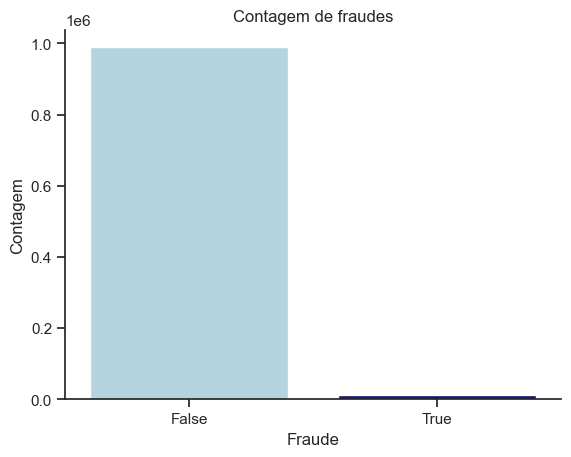

Fraudes: 1.10%
Não fraudes: 98.90%


In [8]:
def plotFraudCount(dados):
    # Definir um estilo de plotagem personalizado
    sns.set(style='ticks')

    # Criar uma lista de cores personalizadas
    custom_palette = ["lightblue", "darkblue"]

    # Criar o gráfico de contagem com cores personalizadas
    sns.countplot(data=dados, x='fraud_bool', palette=custom_palette)

    # Adicionar título e rótulos dos eixos
    plt.title('Contagem de fraudes')
    plt.xlabel('Fraude')
    plt.ylabel('Contagem')

    # Remover as linhas de borda do gráfico
    sns.despine()

    # Exibir o gráfico
    plt.show()
    
    # Calcular a porcentagem de fraudes
    print('Fraudes: {:.2%}'.format(dados['fraud_bool'].mean()))
    print('Não fraudes: {:.2%}'.format(1 - dados['fraud_bool'].mean()))

plotFraudCount(data)


### Tratamento dos dados em falta (missing values)

In [9]:
data['prev_address_months_count'] = data['prev_address_months_count'].replace(-1, np.NaN)
data['current_address_months_count'] = data['current_address_months_count'].replace(-1, np.NaN)


data['intended_balcon_amount'] = np.where(data['intended_balcon_amount'] < 0, np.NaN, data['intended_balcon_amount'])
data['bank_months_count'] = data['bank_months_count'].replace(-1, np.NaN) 
data['session_length_in_minutes'] = data['session_length_in_minutes'].replace(-1, np.NaN)
data['device_distinct_emails_8w'] = data['device_distinct_emails_8w'].replace(-1, np.NaN)

columns_missing_values = ['prev_address_months_count', 'current_address_months_count', 'intended_balcon_amount', 'bank_months_count', 'session_length_in_minutes', 'device_distinct_emails_8w']

Aqui reparamos que o prev_address_months_count e o intended_balcon_amount têm uma percentagem muito alta de missing values. 

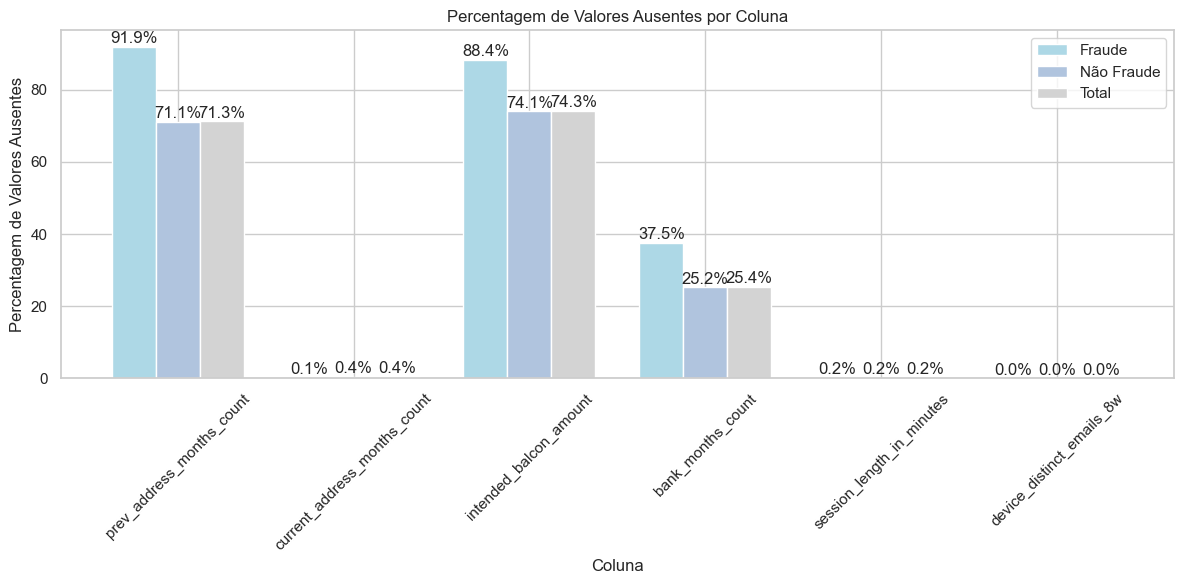

In [19]:
# Calcular a percentagem de valores ausentes para cada categoria

fraud_data = data[data[target] == 1][columns_missing_values]
non_fraud_data = data[data[target] == 0][columns_missing_values]

fraud_missing_percentage = (fraud_data.isna().sum()/len(fraud_data)) * 100
non_fraud_missing_percentage = (non_fraud_data.isna().sum()/len(non_fraud_data)) * 100
total_missing_percentage = (data[columns_missing_values].isna().sum()/len(data[columns_missing_values])) * 100

# Definir o estilo do gráfico
sns.set(style='whitegrid')

# Definir as cores das barras
colors = ['lightblue', 'lightsteelblue', 'lightgray']

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
x = np.arange(len(columns_missing_values))
width = 0.25

# Barras paea a percentagem de valores ausentes quando é fraude
plt.bar(x - width, fraud_missing_percentage, width, color=colors[0], label='Fraude')

# Barras paea a percentagem de valores ausentes quando não é fraude
plt.bar(x, non_fraud_missing_percentage, width, color=colors[1], label='Não Fraude')

# Barras para a porcentagem de valores ausentes total
plt.bar(x + width, total_missing_percentage, width, color=colors[2], label='Total')

# Adicionar rótulos e título ao gráfico
plt.title('Percentagem de Valores Ausentes por Coluna')
plt.xlabel('Coluna')
plt.ylabel('Percentagem de Valores Ausentes')
plt.xticks(x, columns_missing_values, rotation=45)
plt.legend()

# Adicionar percentagens acima das barras
for i in range(len(columns_missing_values)):
    plt.text(x[i] - width, fraud_missing_percentage[i] + 1, f'{fraud_missing_percentage[i]:.1f}%', ha='center')
    plt.text(x[i], non_fraud_missing_percentage[i] + 1, f'{non_fraud_missing_percentage[i]:.1f}%', ha='center')
    plt.text(x[i] + width, total_missing_percentage[i] + 1, f'{total_missing_percentage[i]:.1f}%', ha='center')

# Exibir o gráfico
plt.tight_layout()
plt.show()

### Análise de outliers

A remoção de outliers em dados desequilibrados - como o caso do nosso dataset - pode constituir um desafio. Estes valores atípicos podem conter informações valiosas ou representar casos raros da classe minoritária, tornando arriscada a sua exclusão, pois pode resultar em perda de informação, distorção da distribuição de classes, etc. Além disso, não encontramos nenhum valor que se destacasse significativamente, então decidimos não remover nenhum outlier.

C:\Users\PC\AppData\Local\Temp\ipykernel_26328\3846494404.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=data[data[target] == 0][feature], fill=True, ax=ax, label='Not Fraud')
C:\Users\PC\AppData\Local\Temp\ipykernel_26328\3846494404.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=data[data[target] == 1][feature], fill=True, ax=ax, label='Fraud')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


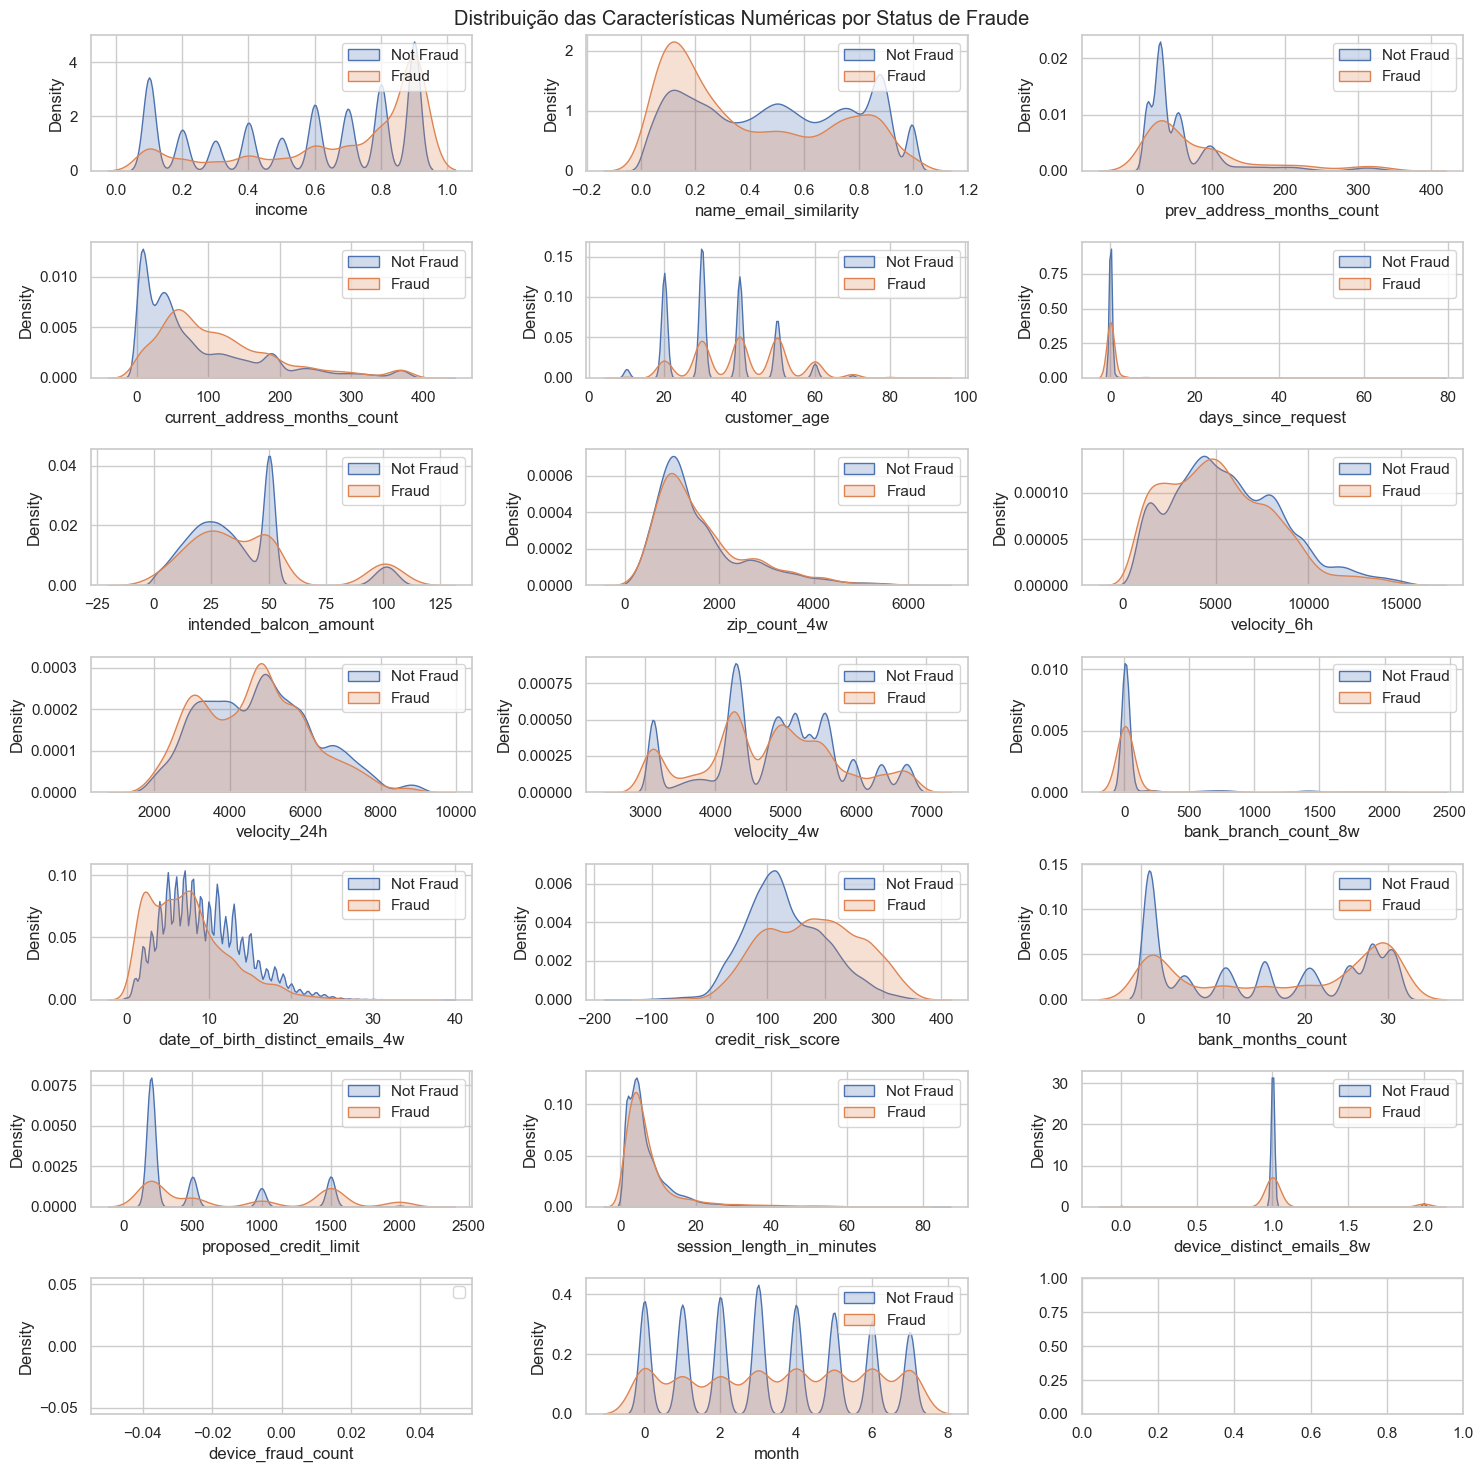

In [11]:
# Criar uma grid de subplots
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(15, 15))
fig.suptitle('Distribuição das Características Numéricas por Status de Fraude')

# Percorrer as características numéricas e fazer um gráfico de densidade para cada característica
for i, feature in enumerate(numeric_features):
    ax = axes[i // 3][i % 3]
    sns.kdeplot(data=data[data[target] == 0][feature], fill=True, ax=ax, label='Not Fraud')
    sns.kdeplot(data=data[data[target] == 1][feature], fill=True, ax=ax, label='Fraud')
    ax.set_xlabel(feature)
    ax.legend()

plt.tight_layout()
plt.show()

## Pré-processamento dos dados

### Engenharia de Features

#### Binarização de variáveis categóricas

No nosso conjunto de dados, verificamos a existência de **variáveis categóricas** que necessitavam de ser **convertidas em valores numéricos**. Tal conversão é imprescindível para assegurar que as variáveis estejam no formato adequado para serem utilizadas em algoritmos de machine learning.

Assim, após termos identificado as colunas que apresentavam tais variáveis (nomeadamente "payment_type", "device_os", "employment_status", "housing_status" e "source"), recorremos ao seguinte algoritmo de binarização:
*  Para cada uma dessas variáveis, o pd.get_dummies() é usado para criar colunas binárias correspondentes aos valores únicos dessa variável no conjunto de dados.
* Renomeamos o nome das colunas - As colunas criadas pelo pd.get_dummies() são renomeadas para garantir que tenham nomes de colunas válidos.
* Concatenação dos dados - O conjunto de dados originais são concatenados com as colunas binárias criadas pelo pd.get_dummies()

In [12]:
data.columns

Index(['fraud_bool', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'payment_type', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'employment_status',
       'credit_risk_score', 'email_is_free', 'housing_status',
       'phone_home_valid', 'phone_mobile_valid', 'bank_months_count',
       'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source',
       'session_length_in_minutes', 'device_os', 'keep_alive_session',
       'device_distinct_emails_8w', 'device_fraud_count', 'month'],
      dtype='object')

In [13]:
binarized_features = []

for column in category_features:
    print(column)
    dummy_columns = pd.get_dummies(data[column])

    dummy_columns.columns = [ str(n) for n in dummy_columns.columns]

    data = pd.concat((dummy_columns, data), axis=1)
    data.drop([column], axis=1, inplace=True)

    binarized_features += [ str(n) for n in dummy_columns.columns]

data.head()

payment_type
employment_status
housing_status
source
device_os


,linux,macintosh,other,windows,x11,INTERNET,TELEAPP,BA,BB,BC,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,False,False,False,True,False,True,False,True,False,False,...,False,24.0,False,500.0,False,3.888115,False,1.0,0.0,7.0
1,False,False,False,True,False,True,False,True,False,False,...,False,15.0,False,1500.0,False,31.798819,False,1.0,0.0,7.0
2,False,False,True,False,False,True,False,True,False,False,...,True,NaN,False,200.0,False,4.728705,False,1.0,0.0,7.0
3,True,False,False,False,False,True,False,True,False,False,...,True,31.0,True,200.0,False,2.047904,False,1.0,0.0,7.0
4,False,True,False,False,False,True,False,True,False,False,...,False,31.0,False,1500.0,False,3.775225,True,1.0,0.0,7.0


### Seleção de Features

#### Apagar colunas com apenas um valor

A coluna *device_fraud_count* apresenta apenas um valor possível, pelo que não é relevante para o nosso modelo. Assim, decidimos apagá-la.

In [14]:
numeric_features.remove('device_fraud_count')
data.drop(['device_fraud_count'], axis=1, inplace=True)

#### Analisar os dados usando um diagrama de extremos e quartis e uma matriz de correlação

O primeiro passo foi construir uma matriz de correlação para vermos que colunas poderiam ser retiradas, por serem semelhantes entre si pela forma como impactam a probabilidade de ser uma fraude ou não.

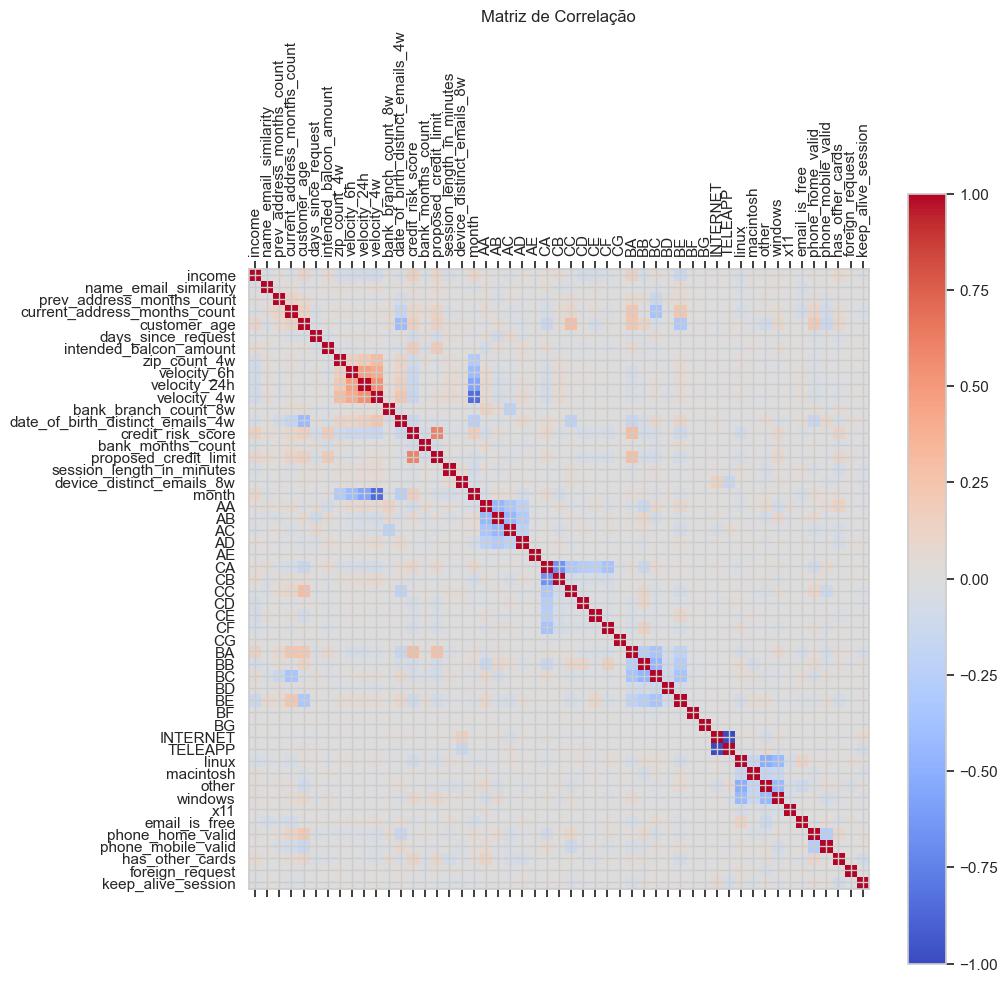

In [15]:
correlation_columns = numeric_features + binarized_features + bool_features 
correlation_columns.remove(target)

# Calcule a matriz de correlação
correlation_matrix = data[correlation_columns].corr()

# Crie uma figura e um subplot
fig, ax = plt.subplots(figsize=(10,10))

# Desenhe a matriz de correlação usando o método matshow do Matplotlib
im = ax.matshow(correlation_matrix, cmap='coolwarm')

# Adicione uma barra de cores para mostrar os valores da matriz de correlação
fig.colorbar(im)

# Defina os locais dos ticks e os rótulos dos eixos
ax.set_xticks(range(len(correlation_columns)))
ax.set_yticks(range(len(correlation_columns)))
ax.set_xticklabels(correlation_columns, rotation=90)
ax.set_yticklabels(correlation_columns)

# Configure o título do gráfico
plt.title('Matriz de Correlação')

# Mostre o gráfico
plt.show()


Mostrar as colunas com valor absoluto de correlação superior a 0.50

In [16]:

for i in range(len(correlation_columns)):
    for j in range(i + 1, len(correlation_columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            print(f'{correlation_columns[i]} e {correlation_columns[j]}: {correlation_matrix.iloc[i, j]:.2f}')


velocity_24h e velocity_4w: 0.54
velocity_24h e month: -0.55
velocity_4w e month: -0.85
credit_risk_score e proposed_credit_limit: 0.61
CA e CB: -0.66
INTERNET e TELEAPP: -1.00
linux e other: -0.51


Com base na observação das colunas INTERNET e TELEAPP, percebemos que ambas estão a mostrar a mesma informação, indicando que uma é o oposto da outra.
Além disso, notamos uma forte correlação entre velocity_4w e month. 

Portanto, para melhorar a eficiência e reduzir a redundância, decicimos remover a coluna TELEAPP e a coluna velocity_4w do conjunto de dados. 
Isso ajuda a reduzir o numero de features e pode ajudar a conseguir melhores resultados.

In [17]:
binarized_features.remove('TELEAPP')
numeric_features.remove('velocity_4w')

data.drop(['TELEAPP', 'velocity_4w'], axis=1, inplace=True)



Após esta análise, decidimos desenhar um gráfico que relaciona-se a matriz de correlação com a coluna fraud_bool, o que nos permitiria verificar quais as colunas que têm mais e menos impacto sobre o resultado.

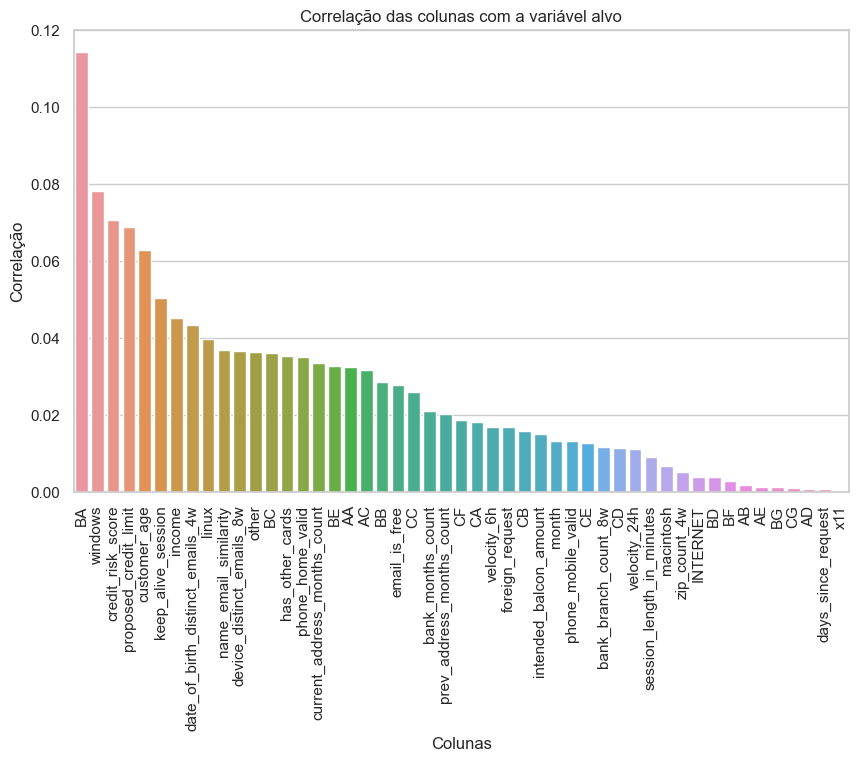

In [18]:


# Calcule a matriz de correlação
correlation_matrix = data.corr()

# Selecione apenas as correlações com a variável alvo
correlations = abs(correlation_matrix[target]).sort_values(ascending=False)[1:]


# Crie um gráfico de barras para visualizar as correlações
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.index, y=abs(correlations.values))
plt.xticks(rotation=90)
plt.xlabel('Colunas')
plt.ylabel('Correlação')
plt.title('Correlação das colunas com a variável alvo')
plt.show()


Podemos observar pelo gráfico que há várias colunas com muito pouco impacto que podem ser removidas.

Decidimos apagar as colunas com correlação inferior a 0.01

In [20]:

deleted = list(correlations[correlations < 0.01].index)

data.drop(deleted, axis=1, inplace=True)

numeric_features = [feature for feature in numeric_features if feature not in deleted]
binarized_features = [feature for feature in binarized_features if feature not in deleted]
bool_features = [feature for feature in bool_features if feature not in deleted]


print("Numeric ", numeric_features)
print("Binarized", binarized_features)
print("Bool", bool_features)

print(f'Colunas apagadas: {deleted}')

Numeric  ['income', 'name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'customer_age', 'intended_balcon_amount', 'velocity_6h', 'velocity_24h', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'bank_months_count', 'proposed_credit_limit', 'device_distinct_emails_8w', 'month']
Binarized ['AA', 'AC', 'CA', 'CB', 'CC', 'CD', 'CE', 'CF', 'BA', 'BB', 'BC', 'BE', 'linux', 'other', 'windows']
Bool ['fraud_bool', 'email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'foreign_request', 'keep_alive_session']
Colunas apagadas: ['session_length_in_minutes', 'macintosh', 'zip_count_4w', 'INTERNET', 'BD', 'BF', 'AB', 'AE', 'BG', 'CG', 'AD', 'days_since_request', 'x11']


### Imputação de valores ausentes (Missing values)


In [21]:
# substitui os valores -1 por NaN
#features.remove('prev_address_months_count')
#train_data['prev_address_months_count'] = train_data['prev_address_months_count'].replace(-1, np.NaN)
#test_data['prev_address_months_count'] = test_data['prev_address_months_count'].replace(-1, np.NaN)
#test_data[features] = test_data[features].replace(-1, np.NaN)

imputer = SimpleImputer(strategy='median')
data[columns_missing_values] = imputer.fit_transform(data[columns_missing_values])
data[columns_missing_values] = imputer.transform(data[columns_missing_values])



KeyError: "['session_length_in_minutes'] not in index"

### Standardization

Neste próximo passo, vamos padronizar os dados numéricos. A padronização com o `StandardScaler` vai transformar os dados para que a sua distribuição tenha uma média de 0 e um desvio padrão de 1. Isto é importante para melhorar a performance e o funcionamento dos algoritmos.

In [22]:
scaler = StandardScaler()

data[numeric_features] = scaler.fit_transform(data[numeric_features])

## Separação dos dados de teste e de treino

Para podermos realizar a análise aos dados, precisamos de uma amostra de dados de treino e uma amostra de dados de teste, sendo o treino 70% dos dados e o teste os restantes 30%. Também igualamos o número de amostras com fraude e sem fraude.

In [23]:

# separa os dados em treino e teste

# Separar as features e o target
X = data.drop(columns=['fraud_bool'])
y = data['fraud_bool']

# Separar em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### SMOTE

In [294]:
def train_classifier(classifier, param_dist, X_train, y_train, binarized_features, search_type='random'):
    
    # Apply SMOTENC to deal with imbalanced classes
    smote_nc = SMOTENC(categorical_features=encoded_features, sampling_strategy='minority', random_state=42)
        
    # Create pipeline with SMOTENC and the classifier
    pipeline = make_pipeline(smote_nc, classifier)
    
    # Define cross-validation strategy
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # Perform hyperparameter search
    if search_type == 'random':
        search_cv = RandomizedSearchCV(estimator=pipeline, 
                                      param_distributions=param_dist,
                                      n_iter=20,
                                      scoring="roc_auc",
                                      n_jobs=-1,
                                      cv=cv, error_score='raise')
    elif search_type == 'grid':
        search_cv = GridSearchCV(estimator=pipeline,
                                 param_grid=param_dist,
                                 scoring="roc_auc",
                                 n_jobs=-1,
                                 cv=cv, error_score='raise')
    else:
        raise ValueError('search_type must be either "random" or "grid"')
        
    # Fit the model and return the trained classifier
    search_cv.fit(X_train, y_train)

    return search_cv

In [14]:
encoded_features = [X_train.columns.get_loc(str(feature)) for feature in X_train.columns if X_train[feature].nunique() >= 2 and X_train[feature].nunique() < 10]

def train_classifier(classifier, param_dist, X_train, y_train, binarized_features):
    # Apply SMOTENC to deal with imbalanced classes
    smote_nc = SMOTENC(categorical_features=binarized_features, sampling_strategy='minority', random_state=42)
        
    # Create pipeline with SMOTENC and the classifier
    pipeline = make_pipeline(smote_nc, classifier)
    
    # Define cross-validation strategy
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    best_score = 0
    best_params = None
    
   
    pipeline.fit(X_train, y_train)
    
    return pipeline

# Instantiate a LGBMClassifier model with GPU acceleration for training
lgbm = LGBMClassifier(device='gpu')

# Define a list of parameter dictionaries for LGBMClassifier
lgbm_param_dist = [
    {'lgbmclassifier__max_depth': 2, 'lgbmclassifier__learning_rate': 0.05, 'lgbmclassifier__n_estimators': 20,
     'lgbmclassifier__min_child_weight': 1, 'lgbmclassifier__subsample': 0.6, 'lgbmclassifier__colsample_bytree': 0.6},
    {'lgbmclassifier__max_depth': 4, 'lgbmclassifier__learning_rate': 0.1, 'lgbmclassifier__n_estimators': 40,
     'lgbmclassifier__min_child_weight': 2, 'lgbmclassifier__subsample': 0.8, 'lgbmclassifier__colsample_bytree': 0.8},
    # Add more parameter combinations as desired
]

# Train a LightGBM classifier using 'train_classifier' function and the given parameters
lgbm_model = train_classifier(lgbm, lgbm_param_dist, X_train, y_train, encoded_features)


In [15]:

prob_predictions = lgbm_model.predict_proba(X_test)

In [18]:
prob_predictions

array([[0.98781376, 0.01218624],
       [0.99250668, 0.00749332],
       [0.98395574, 0.01604426],
       ...,
       [0.91419909, 0.08580091],
       [0.45485709, 0.54514291],
       [0.99564629, 0.00435371]])

## Treinar os Modelos

In [12]:

# Instantiate a LGBMClassifier model with GPU acceleration for training
lgbm = LGBMClassifier(device='gpu')

# Define a dictionary of hyperparameters for LGBMClassifier
lgbm_params = {'lgbmclassifier__max_depth': [2, 4, 6, 8, 10],
               'lgbmclassifier__learning_rate': [0.05, 0.1, 0.15, 0.20],
               'lgbmclassifier__n_estimators': [20, 40, 60, 80, 100],
               'lgbmclassifier__min_child_weight': [1, 2, 3, 4],
               'lgbmclassifier__subsample': [0.6, 0.8, 1.0],
               'lgbmclassifier__colsample_bytree': [0.6, 0.8, 1.0]
              }

# # Train a LightGBM classifier using 'train_classifier' function and the given parameters
lgbm_model = train_classifier(lgbm, lgbm_params, X_train, y_train, encoded_features)



TypeError: sklearn.pipeline.Pipeline.set_params() argument after ** must be a mapping, not str

In [ ]:
print_cv_results(lgb_model)

In [ ]:
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier()

xgb_classifier.fit(train_data[features], train_data[target])


prob_predictions = xgb_classifier.predict_proba(test_data[features])

In [ ]:
print()

In [ ]:

FIXED_FPR = 0.05

dados = []

for i in range(1, 20):
    dados.append([])
    for j in range(1, 20):
        
        neural_network = MLPClassifier(hidden_layer_sizes=(i, j), max_iter=1000, random_state=42)

        neural_network.fit(train_data[features], train_data[target])
        # Calculando a probabilidade de previsão do modelo
        prob_predictions = neural_network.predict_proba(test_data[features])
        
        prob = prob_predictions[:,1]

        fprs, tprs, thresholds = roc_curve(test_data[target], prob)
        tp = tprs[fprs<FIXED_FPR][-1]
        fp = fprs[fprs<FIXED_FPR][-1]
        threshold = thresholds[fprs<FIXED_FPR][-1]
        print(i , ' ', j, tp)
        dados[i-1].append(tp)




In [ ]:
from sklearn import svm


# Criando e treinando o SVM
clf = svm.SVC(kernel='rbf', C=1, gamma='auto', probability=True, verbose=True)
clf.fit(train_data[features], train_data[target])

 
prob_predictions = clf.predict_proba(test_data[features])

In [ ]:
# treinar o modelo

from sklearn.tree import DecisionTreeClassifier


# Cria um objeto de árvore de decisão
tree = DecisionTreeClassifier()

# Treina a árvore de decisão
tree.fit(train_data[features], train_data[target])

prob_predictions = tree.predict_proba(test_data[features])



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=5)

neigh.fit(train_data[features], train_data[target])

prob_predictions = neigh.predict_proba(test_data[features])

In [ ]:
from sklearn.neural_network import MLPClassifier

lbm_prob_predictions = prob_predictions.copy()



neural_network = MLPClassifier(hidden_layer_sizes=(15, 15), max_iter=1000, random_state=42)

neural_network.fit(train_data[features], train_data[target])
# Calculando a probabilidade de previsão do modelo
prob_predictions = neural_network.predict_proba(test_data[features])

neural_predictions = prob_predictions

In [21]:


lgbm_classifier = LGBMClassifier()

lgbm_classifier.fit(X_train, y_train)

prob_predictions = lgbm_classifier.predict_proba(X_test)




In [14]:
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier on the training data
nb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb_classifier.predict(X_test)

ValueError: Input X contains NaN.
GaussianNB does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# train random forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

random_forest.fit(train_data[features], train_data[target])

prob_predictions = random_forest.predict_proba(test_data[features])



## Avaliar

In [ ]:
#prob_predictions = predictions
# set FPR Error
FIXED_FPR = 0.05

# Fazendo previsões no conjunto de teste
#predictions = clf.predict(test_data[features])

In [ ]:

# Avalia o modelo
best_f1 = 0

acceptance_rate_list = [x/100.0 for x in range(0, 100, 5)]
f1_list = []

for acceptance_rate in acceptance_rate_list:
    predictions = np.where(prob_predictions[:,1] > acceptance_rate, 1, 0)

    # Avalia o modelo

    accuracy = accuracy_score(test_data[target], predictions)
    precision = precision_score(test_data[target], predictions)
    recall = recall_score(test_data[target], predictions)
    f1 = f1_score(test_data[target], predictions)
    f1_list.append(f1)

    
    if f1 > best_f1:
        best_f1 = f1
        best_acceptance_rate = acceptance_rate


predictions = np.where(prob_predictions[:,1] > best_acceptance_rate, 1, 0)


print(f1_list)

# mostrar a curva ROC
plt.plot(acceptance_rate_list ,f1_list ), 
plt.ylabel('F1 Score')
plt.xlabel("Acceptance Rate ")
plt.show()
print('Best acceptance rate:', best_acceptance_rate)

accuracy = accuracy_score(test_data[target], predictions)
precision = precision_score(test_data[target], predictions)
recall = recall_score(test_data[target], predictions)
f1 = f1_score(test_data[target], predictions)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)


In [ ]:
print(confusion_matrix(test_data[target], y_pred).ravel())
print(sum(confusion_matrix(test_data[target], y_pred).ravel()))

In [ ]:
# Testing the DecisionTree model using the test data and calculating metrics
dt_fpr, dt_tpr, dt_default_recall, dt_target_recall = test_classifier(dt_model, X_test, y_test)

AUC: 0.8760660542525678
TPR(Recall): 0.4942084942084942
FPR: 0.049866333145671585
Threshold: 0.026755565338736912
Predictive Equality: 0.1011181332036947

True Negatives: 281841
False Positives: 14792
False Negatives: 1703
True Positives: 1664
F1 score: 0.16788578923472733


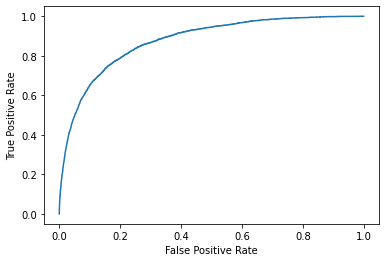

In [22]:


FIXED_FPR = 0.05

prob = prob_predictions[:,1]

# Calculando AUC
auc = roc_auc_score(y_test, prob)
print('AUC:', auc)

# Calculando a curva ROC e obtendo TPR, FPR e Threshold
fprs, tprs, thresholds = roc_curve(y_test, prob)
tp_percentage = tprs[fprs<FIXED_FPR][-1]
fp_percentage = fprs[fprs<FIXED_FPR][-1]
threshold = thresholds[fprs<FIXED_FPR][-1]



# Calculando a matriz de confusão
y_pred = (prob >= threshold).astype(int)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()


# Calculando a equidade preditiva
predictive_equality = tp / (tp + fp) 
print('TPR(Recall):', tp_percentage )
print('FPR:', fp_percentage)
print('Threshold:', threshold)
print('Predictive Equality:', predictive_equality)

print()

print('True Negatives:', tn)
print('False Positives:', fp)
print('False Negatives:', fn)
print('True Positives:', tp)

predictions = np.where(prob_predictions[:,1] >= threshold, 1, 0)

f1 = f1_score(y_test, predictions)
print('F1 score:', f1)

# mostrar a curva ROC
plt.plot(fprs,tprs)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

